# Dinosaur Fossil Recorde Insights

## 1.	Introduction
The national museum of natural history has recently created a database containing all dinosaur records of past field campaigns. The objective of this project is to uncover interesting insights to enhance the museum's understanding of its fossil collection and provide recommendations for data quality improvement. [1]

### 1.1 Stakeholder Requests
1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Create an interactive map showing each record.
6. Any other insights you found during your analysis?

By addressing these questions, the project sought 

[1] *This project is based on a competition I participated in through DataCamp.*


## 2. Data
The dataset containing dinosaur records was collected from the Paleobiology Database ([source](https://paleobiodb.org/#/)). The following table gives a brief description of the columns and key variables.


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

*The data was enriched with data from Wikipedia.*

### 2.1. Initial Data Exploration

#### 2.1.1 Import Main Libraries

In [1]:
# Import the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
from folium.plugins import MarkerCluster

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
import missingno as msno

#### 2.1.2 Load Data and Initial Exploration

In [6]:
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [7]:
#Look into each column data type and overview of numerical columns:
print(dinosaurs.info())
dinosaurs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


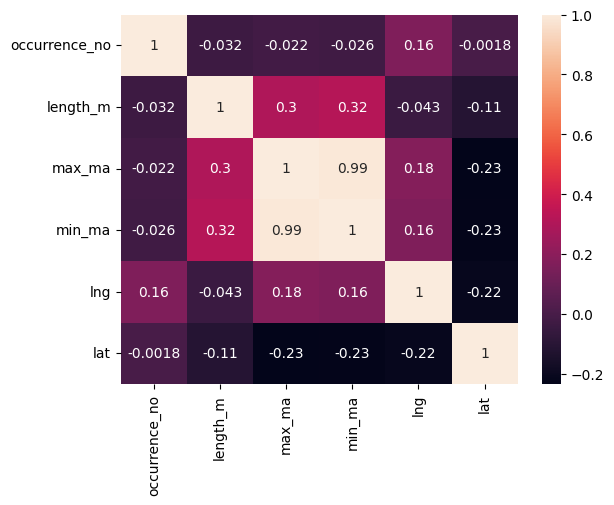

In [8]:
numerical_cols = dinosaurs.select_dtypes(include='number')
sns.heatmap(numerical_cols.corr(),  annot= True)
plt.show()

### 2.2 Duplicated Records
There are no duplicated records in this dataset.

In [9]:
dinosaurs.duplicated().sum()

np.int64(0)

### 2.3 Unique Values
Below we can see the number of unique values for each feature in the dataset.

In [10]:
dinosaurs.nunique()

occurrence_no    4951
name             1042
diet                3
type                6
length_m           71
max_ma             57
min_ma             57
region            287
lng              2472
lat              2423
class               2
family             75
dtype: int64

### 2.4 Missing Data
There are 1,355 (27.4% of the total data) that are missing values in 'type', 'length_m' and 'diet' columns. From these 1,355 records 675 rows are also missing values in 'family column'. </br>
Additionally 'family' column is missing values for another 482 records (A total of 1,457 records are missing values for the 'family' column)</br>
In total there are 1383 records missing values in 'length_m' column.</br>
There are also some data missing in 'region' column.</br>

Although many records in the dataset have missing values across multiple features simultaneously (such as 'type', 'diet', and 'length_m'), the missingness does not appear to be related to specific ages or geographic regions. This suggests that the data may be missing at random (MAR), as the missingness seems independent of other observed features.

In [11]:
# Create a DataFrame with missing count and missing percentage
missing_data = dinosaurs.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage (%)'] = round((dinosaurs.isnull().mean() * 100),2)

# Print the table
print(missing_data)

               Missing Count  Missing Percentage (%)
occurrence_no              0                    0.00
name                       0                    0.00
diet                    1355                   27.37
type                    1355                   27.37
length_m                1383                   27.93
max_ma                     0                    0.00
min_ma                     0                    0.00
region                    42                    0.85
lng                        0                    0.00
lat                        0                    0.00
class                      0                    0.00
family                  1457                   29.43


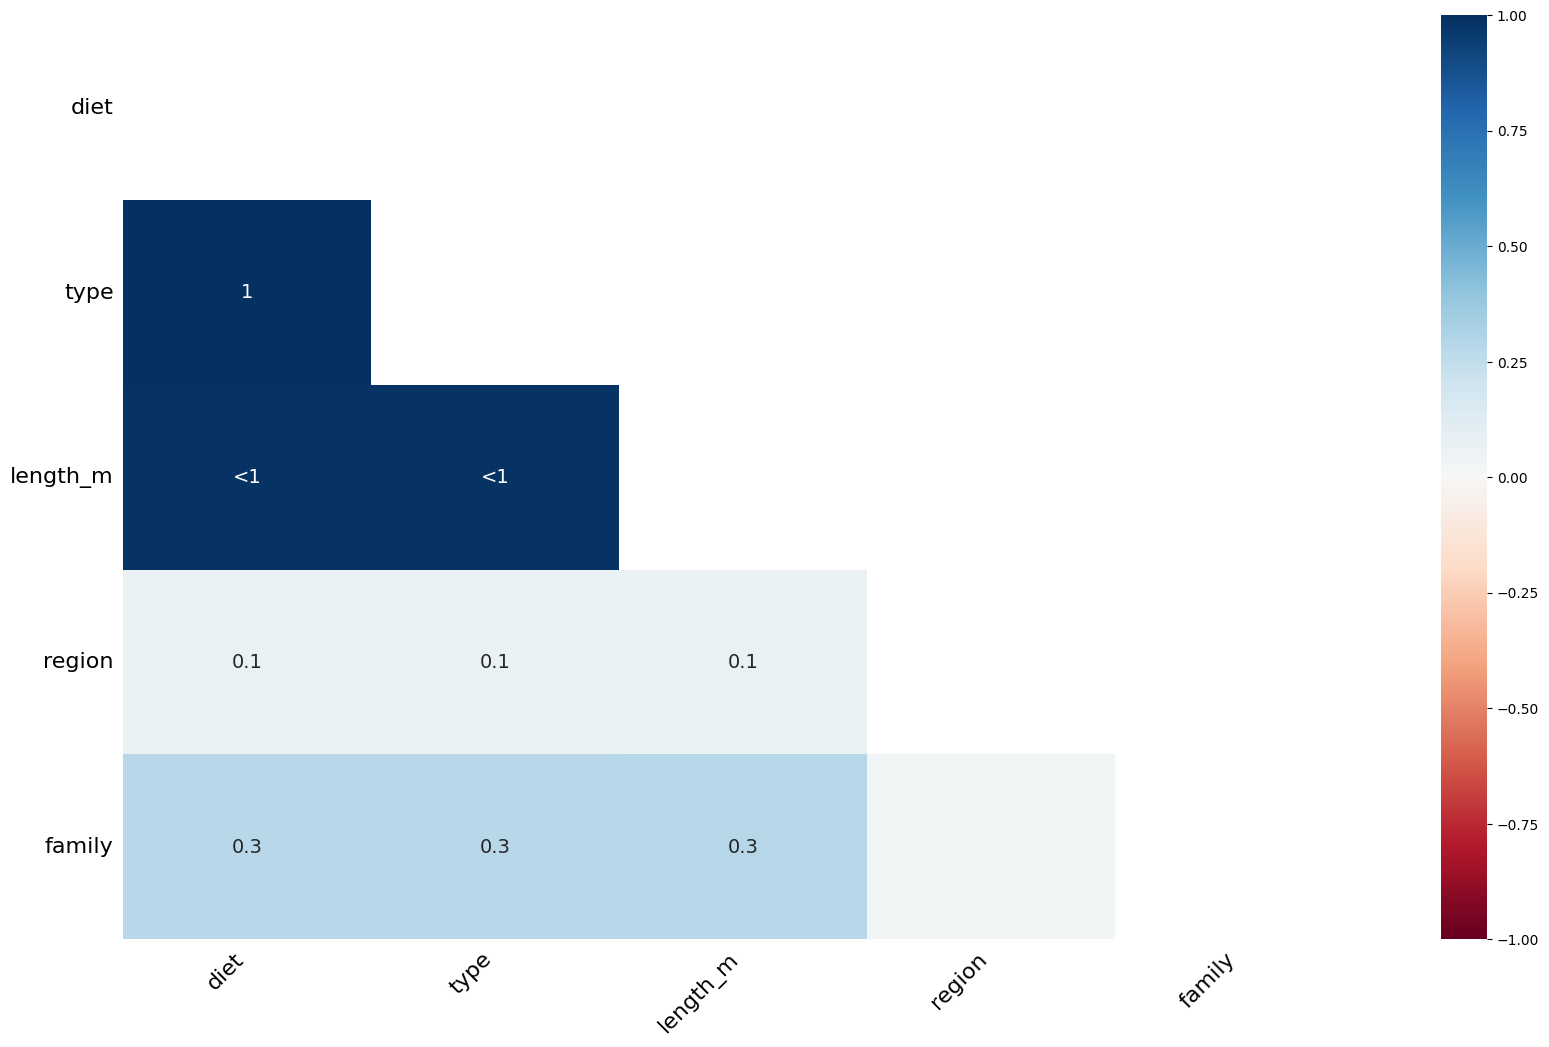

In [12]:
# Visualize correlations in missing data
msno.heatmap(dinosaurs)
plt.show()

In [13]:
dinosaurs[(dinosaurs['type'].isna())&~(dinosaurs['length_m'].isna())]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


In [14]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [15]:
from scipy.stats import chi2_contingency


In [16]:
def little_mcar_test(dataframe):
    # Get the missingness pattern
    missing_data = dataframe.isnull()
    n_rows, n_cols = missing_data.shape

    # Create a contingency table of missing vs. observed data
    contingency_table = pd.DataFrame(missing_data).value_counts().unstack().fillna(0)
    
    # Perform the chi-squared test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    return chi2, p_value

# Conduct Little's MCAR test
chi2_stat, p_val = little_mcar_test(dinosaurs)

# Display the results
print("Little's MCAR Test Results:")
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"p-value: {p_val}")



Little's MCAR Test Results:
Chi-squared Statistic: 402.83856851550337
p-value: 6.775918642509622e-86


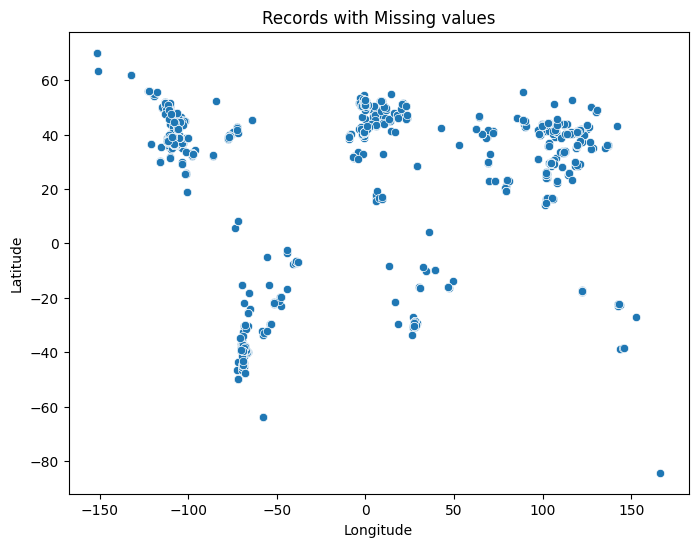

In [17]:
# Filter rows where 'type' is missing
missing_type_data = dinosaurs[dinosaurs['type'].isna()]

# Check if lng and lat columns exist in your dataset (replace with your actual column names)
if 'lng' in missing_type_data.columns and 'lat' in missing_type_data.columns:
    # Create a scatter plot of lng and lat for records with missing 'type'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='lng', y='lat', data=missing_type_data)

    # Adding labels and title
    plt.title("Records with Missing values")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show the plot
    plt.show()

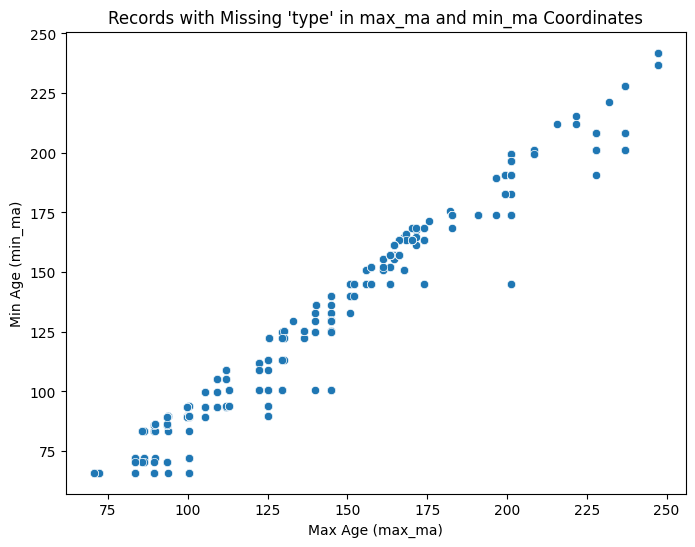

In [18]:
if 'max_ma' in missing_type_data.columns and 'min_ma' in missing_type_data.columns:
    # Create a scatter plot of max_ma and min_ma for records with missing 'type'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='max_ma', y='min_ma', data=missing_type_data)

    # Adding labels and title
    plt.title("Records with Missing 'type' in max_ma and min_ma Coordinates")
    plt.xlabel("Max Age (max_ma)")
    plt.ylabel("Min Age (min_ma)")

    # Show the plot
    plt.show()

### 2.5 Pre-Processing

The Dinosauria contains two major groups of dinosaurs: the Ornithischia, or "bird-hipped" dinosaurs, and the Saurischia, or "lizard-hipped" dinosaurs. The most prominent visible difference between the two types of hip is the orientation of the pubis, shown in white in the picture below.</br>
![dinohips](./dinohips.jpg) </br>
picture source[https://ucmp.berkeley.edu/diapsids/dinomm.html] </br>
Except for a few inconsistent records, the dinosaurs classification in the dataset generally follows the below hierarchy structure:</br> 
class 
   → type 
      → family 
        → name </br> 
![categories](./dinosaurs-categories.jpg) </br>
These categories are further divided into families. Our dataset contains a total of 75 unique family types of dinosaurs. The records with missing family values however, might belong to the families that are not captured in those unique values.</br>
**Correct the Class of All Records** </br>
There are two records misclassified under incorrect categories. Those are corrected prior to handling the misising values. </br>
**Type and Family Missing Values** </br>
In this hierarchy there are numerous missing values in columns 'type' and 'family'. Except for the following families {Dromaeosauridae,
Herrerasauridae, Ornithomimidae, Troodontidae} that overlap in type between small and large theropods, all families only map to a specific type. So for the records where the 'family' column is known and the 'type' column is missing (except for aformentioned families), we filled in the dinoasur type using the type associated with that specific family.

This is also true for names. Each name can only belong to a specific family, type and class. That is good because we don't have any missing value in names. There could be an effort in completing this dataset just by researching the record names where type and family missing and fill those values. However it cannot be filled in by using only this dataset, because the names with missing values do not correspond to any other record with the same name which has the values filled for type and family categories.

**Diet Missing Values** </br>

All known Ornithischian dinosaurs are herbivorous. This group includes a diverse range of species, such as stegosaurs, ankylosaurs, and hadrosaurs, which all primarily fed on plants. They evolved various adaptations for grazing and browsing on vegetation, making them distinct from the carnivorous theropods.

The dataset that we have confirm this fact. since we know the class of all records, the missing diet values for all 'Ornithischia' records are set to 'herbivorous'

**Region Missing Values** </br>
Filled in missing 'region' values by identifying the nearest data point with a valid region, considering a proximity of ±5 degrees in both longitude and latitude.

Once these values are filled in there are still missing values present in our dataset:</br>
</br>
| diet       |  959</br>
| type       | 909</br>
| length_m   |  1383</br>
| region     |  12</br>
| family     |  1457</br>
</br>
Other methods like K-nearest neighbors (KNN) has been evaluated to model the length or type of the missing record, however do to lack of number of features available in the dataset and the extent of missing values these models are not accurate enough for filling in the records. 

**Categorical Missing Values** </br>
All the remaining categorical missing values are replaced by "NULL" to be considerd in the analysis afterward.

**Length Missing Values** </br>
After processing all categorical missing values, 909 rows remain where the 'type' category is undetermined, and these are filled with a "NULL" value. For the remaining dataset (4042 records), we can apply imputation techniques using the median 'length_m' based on dinosaur type to handle the missing values in the 'length_m' column. This approach is justified by several factors: the missing values are missing at random (MAR), approximately 11% (472 out of 4042) of the records have missing data, and the statistical relationship between dinosaur length and type has been shown to be significant. Since the length data is skewed and contains outliers, the median is chosen over the mean for imputation, as it provides a more robust estimate.
 </br>
 </br>
To proceed with the subsequent analysis, particularly for size-related metrics, two datasets were created to facilitate this process:
</br>
 ***dinosaurs_available_length***: This dataset includes only the records without missing values in the 'length_m' column, containing 3568 entries.
***dinosaurs_filled_length***: This dataset comprises the records where missing 'length_m' values were imputed using the median length for each dinosaur type, alongside the records that originally had no missing values, totaling 4042 entries.


There are two records misclassified under incorrect categories. We will correct these classifications here.

In [19]:
type_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['type'])
print(type_class_table)

type          armored dinosaur  ceratopsian  large theropod  ornithopod  \
class                                                                     
Ornithischia               307          363               1         810   
Saurischia                   0            0             732           1   

type          sauropod  small theropod  
class                                   
Ornithischia         0               0  
Saurischia         665             717  


In [20]:
dinosaurs.loc[(dinosaurs['class'] == 'Ornithischia') & (dinosaurs['type'] == 'large theropod'), 'class'] = 'Saurischia'
dinosaurs.loc[(dinosaurs['class']=='Saurischia') & (dinosaurs['type']=='ornithopod'),'class']='Ornithischia'

In [21]:
# Group the data by 'type' and get the unique values of 'family' for each group
unique_families_per_type = dinosaurs.groupby('type')['family'].unique()
# Display the result
print(unique_families_per_type )

type
armored dinosaur    [Ankylosauridae, Stegosauridae, nan, Nodosauri...
ceratopsian         [Chaoyangsauridae, Ceratopsidae, nan, Psittaco...
large theropod      [Tyrannosauridae, Allosauridae, nan, Carcharod...
ornithopod          [nan, Hadrosauridae, Pachycephalosauridae, Hyp...
sauropod            [nan, Diplodocidae, Massospondylidae, Dicraeos...
small theropod      [Archaeopterygidae, Caudipterygidae, nan, Drom...
Name: family, dtype: object


In [22]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_type = dinosaurs.groupby('family')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families = family_to_type[family_to_type > 1]
inconsistent_families

family
Dromaeosauridae    2
Herrerasauridae    2
Ornithomimidae     2
Troodontidae       2
Name: type, dtype: int64

In [23]:
x = dinosaurs[dinosaurs['family'].isin(inconsistent_families.index)]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family
type,,,,,,,,,,,
large theropod,168,7,2,5,16,12,23,144,147,1,4
small theropod,541,19,1,11,22,21,38,297,288,1,4


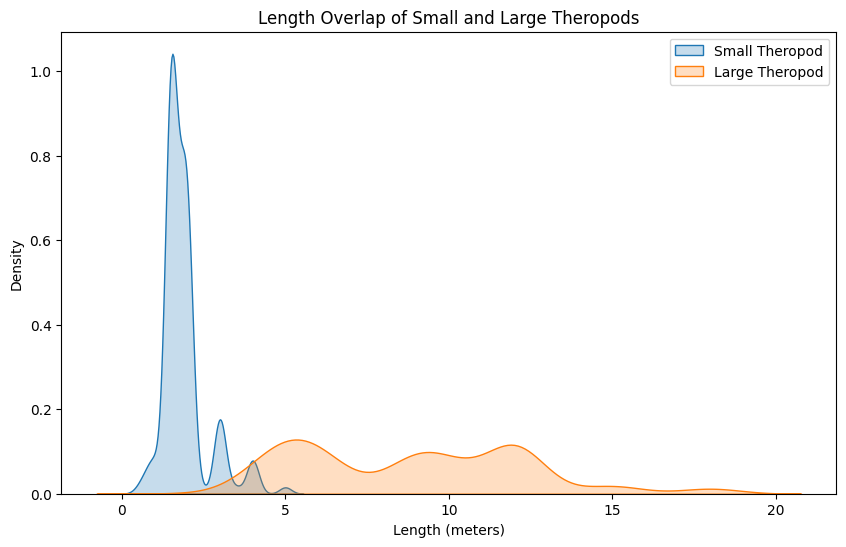

In [24]:
plt.figure(figsize=(10, 6))

# Filter the dataset for 'small theropod' and 'large theropod'
filtered_dinosaurs = dinosaurs[dinosaurs['type'].isin(['small theropod', 'large theropod'])]
# Plot the density for both theropod types
sns.kdeplot(data=filtered_dinosaurs[filtered_dinosaurs['type'] == 'small theropod'], 
            x='length_m', label='Small Theropod', fill=True)
sns.kdeplot(data=filtered_dinosaurs[filtered_dinosaurs['type'] == 'large theropod'], 
            x='length_m', label='Large Theropod', fill=True)

# Add titles and labels
plt.title('Length Overlap of Small and Large Theropods')
plt.xlabel('Length (meters)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [25]:
# List of families to exclude from the fill operation
excluded_families = ["Dromaeosauridae", "Herrerasauridae", "Ornithomimidae", "Troodontidae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_type = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['type'].notna()].set_index('family')['type'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['type'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'type'] = dinosaurs.loc[condition, 'family'].map(family_to_type)

In [26]:
# Group by 'name' and count the number of unique 'type' & 'family' values for each name
name_to_type = dinosaurs.groupby('name')['type'].nunique()
name_to_family = dinosaurs.groupby('name')['family'].nunique()

# Identify names associated with more than one type or family
inconsistent_name_type = name_to_type[name_to_type > 1]
print(inconsistent_name_type)
inconsistent_name_family = name_to_family[name_to_family >1]
print(inconsistent_name_family)

Series([], Name: type, dtype: int64)
Series([], Name: family, dtype: int64)


In [27]:
# Create a mapping of 'name' to 'type' and 'family' where they are not null 
name_to_type = dinosaurs[dinosaurs['type'].notna()].set_index('name')['type'].to_dict()
name_to_family = dinosaurs[dinosaurs['family'].notna()].set_index('name')['family'].to_dict()

# Identify rows where 'type' or 'family' is null and 'name' is not null
condition1 = dinosaurs['type'].isna() & dinosaurs['name'].notna() 
condition2 = dinosaurs['family'].isna() & dinosaurs['name'].notna() 

# Use the name-to-type and name-to-family dictionary to fill in the missing values
dinosaurs.loc[condition1, 'type'] = dinosaurs.loc[condition1, 'name'].map(name_to_type)
dinosaurs.loc[condition2, 'family'] = dinosaurs.loc[condition2, 'name'].map(name_to_family)

In [28]:
diet_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['diet'])
print(diet_class_table)

diet          carnivorous  herbivorous  omnivorous
class                                             
Ornithischia            0         1481           0
Saurischia           1308          595         212


In [29]:
# Fill missing diet values with "herbivorous" where the class is "Ornithischia"
dinosaurs.loc[(dinosaurs['diet'].isna()) & (dinosaurs['class'] == 'Ornithischia'), 'diet'] = 'herbivorous'

In [30]:
def fill_region(row, df):
    if pd.isnull(row['region']):
        lat = row['lat']
        lng = row['lng']
        
        # Filter rows where lat and lng are within ±5, and 'region' is not null
        matching_rows = df[(np.abs(df['lat'] - lat) < 5) & 
                           (np.abs(df['lng'] - lng) < 5) & 
                           df['region'].notnull()]
        
        if not matching_rows.empty:
            # Calculate distances between the current row and matching rows
            matching_rows['distance'] = np.sqrt((matching_rows['lat'] - lat)**2 + 
                                                (matching_rows['lng'] - lng)**2)
            
            # Get the row with the minimum distance
            closest_row = matching_rows.loc[matching_rows['distance'].idxmin()]
            
            # Return the region from the closest row
            return closest_row['region']
    
    return row['region']

# Apply the function to each row in the dataset using 'axis=1' for row-wise application
dinosaurs['region'] = dinosaurs.apply(lambda row: fill_region(row, dinosaurs), axis=1)


In [31]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              959
type              909
length_m         1383
max_ma              0
min_ma              0
region             12
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [32]:
# Replace missing values in the specified categorical columns with 'NULL'
columns_to_fill = ['diet', 'type', 'region', 'family']

# Using fillna() to replace NaN values with 'NULL'
dinosaurs[columns_to_fill] = dinosaurs[columns_to_fill].fillna('NULL')

In [33]:
dinosaurs.groupby('type')['length_m'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
NULL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armored dinosaur,303.0,6.284488,2.028813,1.20,5.0,6.5,8.5,10.0
ceratopsian,355.0,5.692676,3.004977,0.50,2.0,6.0,9.0,9.0
large theropod,732.0,8.860383,3.461690,2.00,6.0,9.0,12.0,18.0
ornithopod,797.0,7.135634,3.378670,0.80,4.0,7.0,10.0,15.0
sauropod,664.0,17.842169,7.704324,2.00,12.0,21.0,23.0,35.0
small theropod,717.0,1.893543,0.684190,0.45,1.5,1.8,2.0,5.0


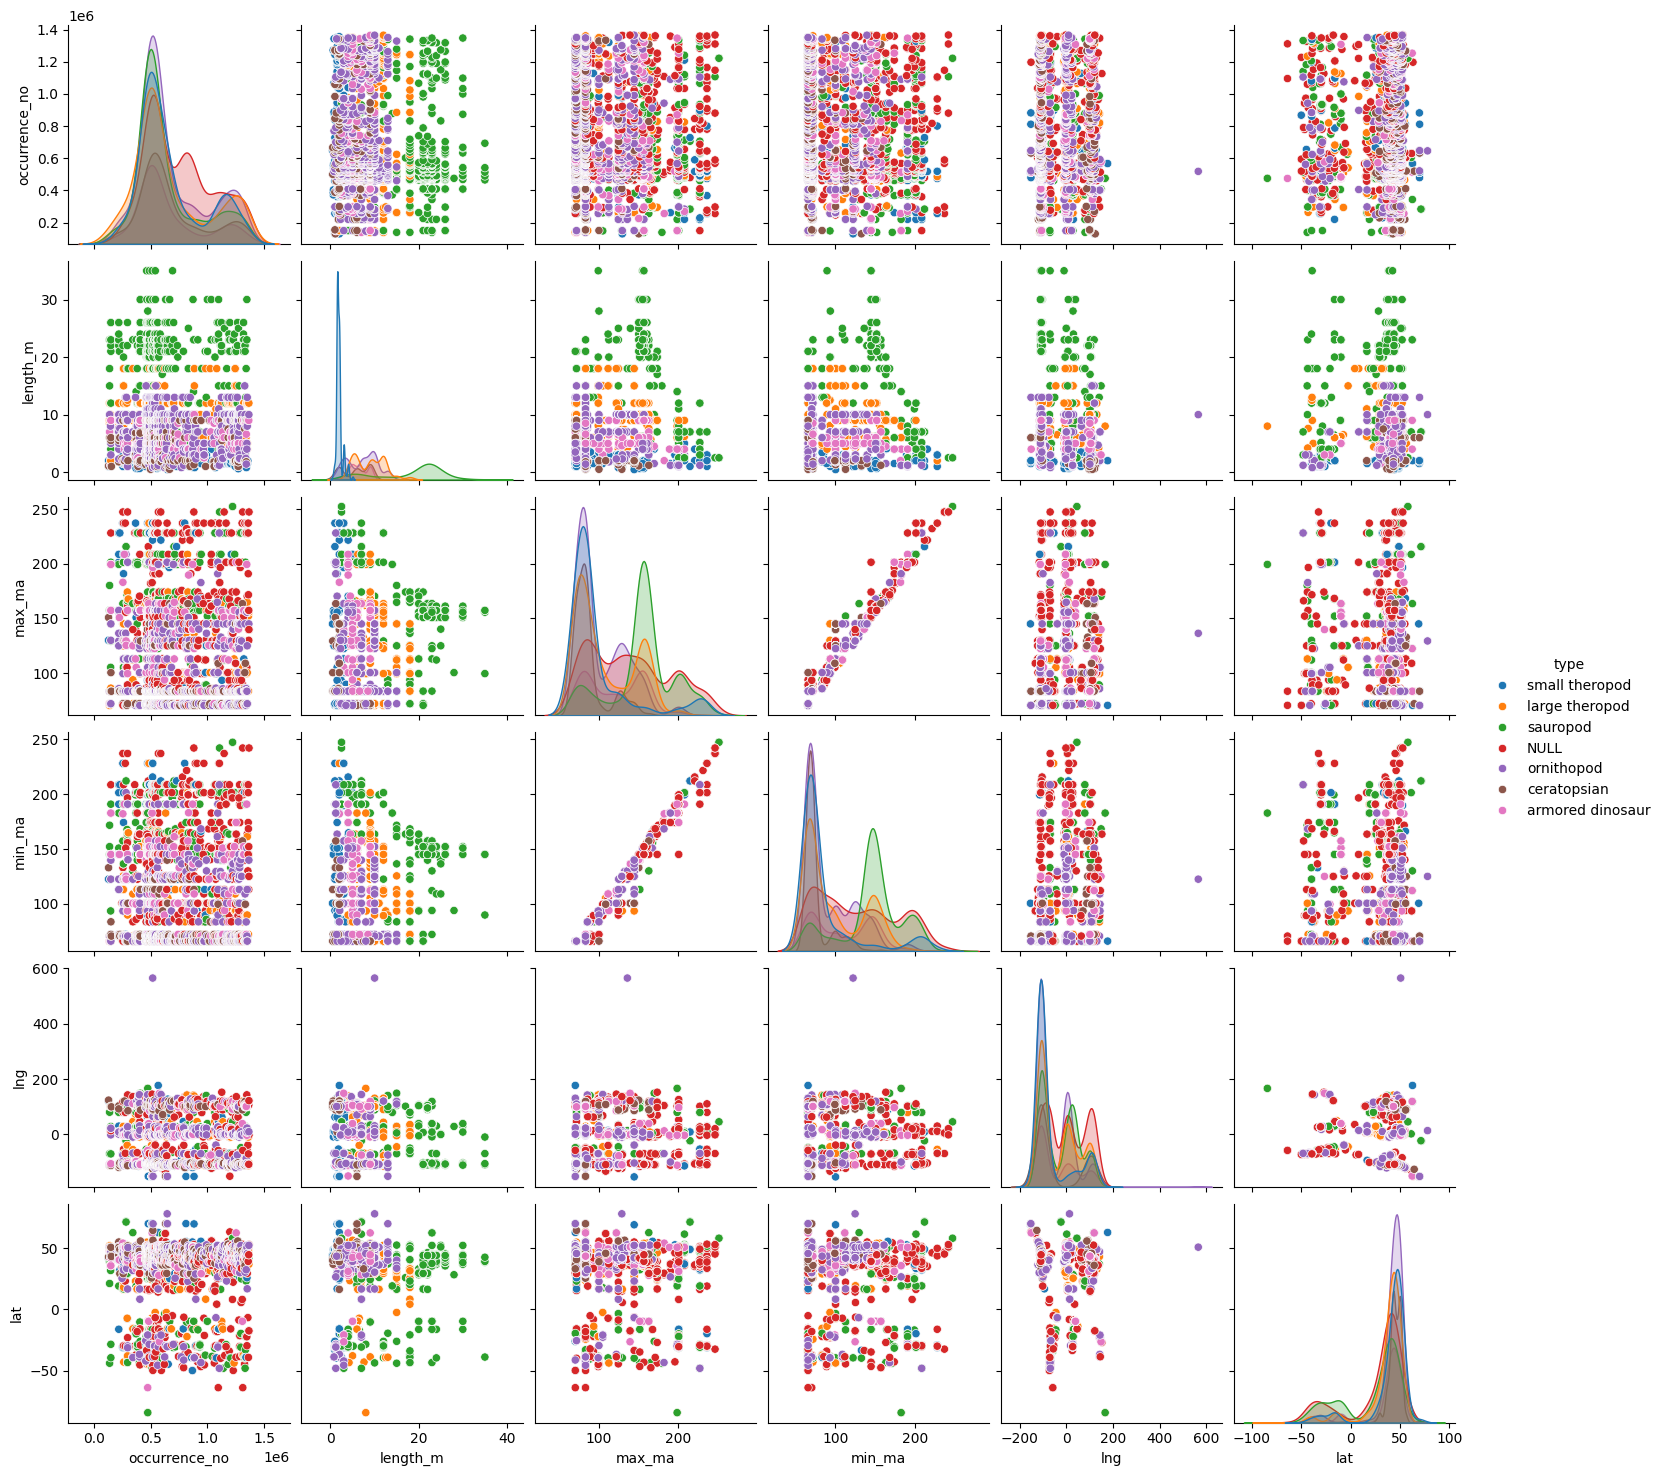

In [34]:
# Pair plot with hue set to type 
sns.pairplot(dinosaurs, hue='type')
plt.show()

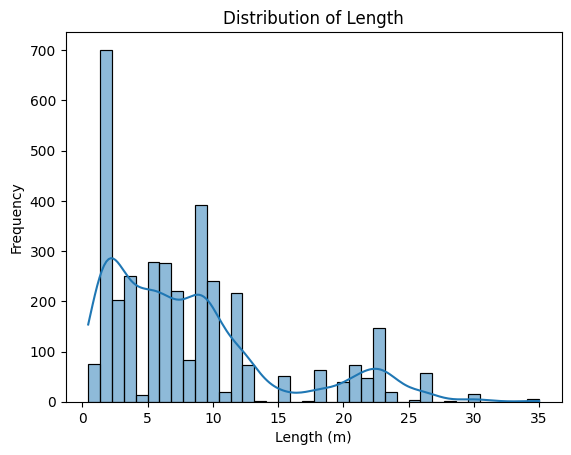

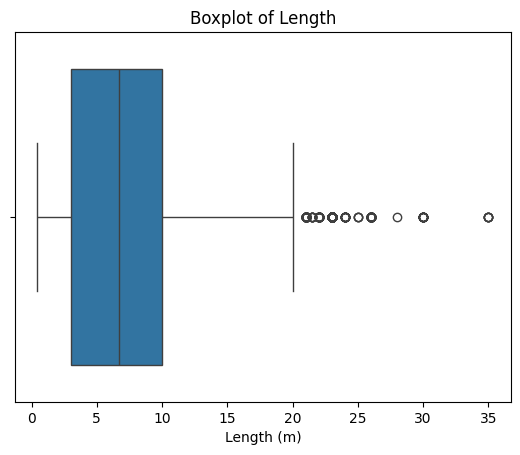

In [35]:
# Plot the distribution of 'length_m'
sns.histplot(dinosaurs['length_m'].dropna(), kde=True)  # kde=True adds a kernel density estimate to the plot
plt.title('Distribution of Length')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot to check for outliers
sns.boxplot(x=dinosaurs['length_m'])
plt.title('Boxplot of Length')
plt.xlabel('Length (m)')
plt.show()

In [36]:
from scipy.stats import kruskal
dinosaurs_non_missing = dinosaurs.dropna(subset=['length_m'])

# Perform Kruskal-Wallis test
kruskal_result = kruskal(*[dinosaurs_non_missing[dinosaurs_non_missing['type'] == t]['length_m'] for t in dinosaurs_non_missing['type'].unique()])

# Print the Kruskal-Wallis test result
print('Kruskal-Wallis test result:', kruskal_result)

# Check if the p-value is less than 0.05
if kruskal_result.pvalue < 0.05:
    print("The relationship between 'type' and 'length_m' is statistically significant.")
else:
    print("The relationship between 'type' and 'length_m' is NOT statistically significant.")


Kruskal-Wallis test result: KruskalResult(statistic=np.float64(2094.6819662691023), pvalue=np.float64(0.0))
The relationship between 'type' and 'length_m' is statistically significant.


In [37]:
grouped_stats = dinosaurs.groupby('type')['length_m'].agg(['mean', 'median', 'std'])
print(grouped_stats)

                       mean  median       std
type                                         
NULL                    NaN     NaN       NaN
armored dinosaur   6.284488     6.5  2.028813
ceratopsian        5.692676     6.0  3.004977
large theropod     8.860383     9.0  3.461690
ornithopod         7.135634     7.0  3.378670
sauropod          17.842169    21.0  7.704324
small theropod     1.893543     1.8  0.684190


In [38]:
dinosaurs_available_length = dinosaurs[dinosaurs['length_m'].notnull()].copy()
dinosaurs_filled_length = dinosaurs.copy()
dinosaurs_filled_length['length_m'] = dinosaurs_filled_length.groupby('type')['length_m'].transform(lambda x: x.fillna(x.median()))
dinosaurs_filled_length= dinosaurs_filled_length [dinosaurs_filled_length['length_m'].notnull()]

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [39]:
print(dinosaurs_available_length.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3568 entries, 0 to 4949
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  3568 non-null   int64  
 1   name           3568 non-null   object 
 2   diet           3568 non-null   object 
 3   type           3568 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         3568 non-null   float64
 6   min_ma         3568 non-null   float64
 7   region         3568 non-null   object 
 8   lng            3568 non-null   float64
 9   lat            3568 non-null   float64
 10  class          3568 non-null   object 
 11  family         3568 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 362.4+ KB
None


In [40]:
print(dinosaurs_filled_length.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 4949
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4042 non-null   int64  
 1   name           4042 non-null   object 
 2   diet           4042 non-null   object 
 3   type           4042 non-null   object 
 4   length_m       4042 non-null   float64
 5   max_ma         4042 non-null   float64
 6   min_ma         4042 non-null   float64
 7   region         4042 non-null   object 
 8   lng            4042 non-null   float64
 9   lat            4042 non-null   float64
 10  class          4042 non-null   object 
 11  family         4042 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 410.5+ KB
None


## 3. Results
### 3.1. Dinosaurs Diversity in Dataset

The dataset comprises 4,951 records, representing **1,042 unique dinosaur** names (genus name or name of footprint/egg fossil). This shows the biodiversity of the Mesozoic Era,  which is also known as the age of reptiles, that began 252.2 million years ago and ended 66 milion years ago, comprising the following periods: </br>
</br>
**Triassic Period**: 252–201 million years ago </br>
**Jurassic Period**: 201–145 million years ago </br>
**Cretaceous Period**: 145–66 million years ago </br>
</br>
Here are some things to know about these periods: </br>

The end of the **Triassic** period was marked by a mass extinction that killed off at least half of all life on Earth. Scientists believe the extinction was caused by a combination of factors, including tectonic shifts, volcanic activity, climate change, and ocean changes. </br>

The **Jurassic** period was a time of warm, wet weather, lush vegetation, and the proliferation of dinosaurs and other animals. </br>

The **Cretaceous** period was a time of global warming and a more equable climate than the present day

As we progress through geological time, the number of records in our dataset increases significantly. This trend could be attributed to either the growing diversity of dinosaurs over time or our enhanced ability to discover fossils from more recent periods. Further studies are needed to validate these hypotheses. Below is the count of records for each geological period: </br>
Triassic       404 </br>
Jurassic      1212</br>
Cretaceous    3335</br>

Additionally, the graph below illustrates the number of records and unique genus names for every ~9 million years.

In [41]:
print("Original dinosaurs dataset:")
print("Number of rows:", len(dinosaurs))
print("Number of unique names:", dinosaurs['name'].nunique())

Original dinosaurs dataset:
Number of rows: 4951
Number of unique names: 1042


In [42]:
# Define a function to classify periods
def classify_period(row):
    if row['max_ma'] >= 201 and row['min_ma'] <= 252:
        return 'Triassic'
    elif row['max_ma'] >= 145 and row['min_ma'] <= 201:
        return 'Jurassic'
    elif row['max_ma'] >= 66 and row['min_ma'] <= 145:
        return 'Cretaceous'
    else:
        return 'Other'    # For any data points outside of these periods

# Apply the classification function to the dataset
dinosaurs['period'] = dinosaurs.apply(classify_period, axis=1)

dinosaurs.groupby('period').size().sort_values()

period
Triassic       404
Jurassic      1212
Cretaceous    3335
dtype: int64

/tmp/ipykernel_1741/1148872053.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_names_per_bin = dinosaurs.groupby(pd.cut(dinosaurs['max_ma'], bins=bins))['name'].nunique()


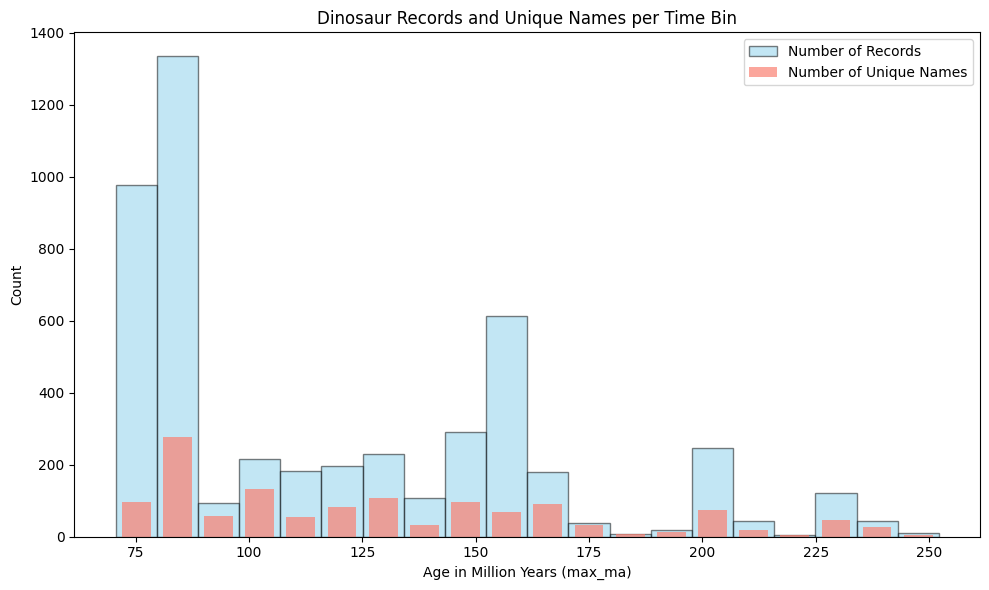

In [43]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for number of records (max_ma)
n, bins, patches = ax.hist(dinosaurs['max_ma'], bins=20, alpha=0.5, label='Number of Records', color='skyblue', edgecolor='black')

# Group by the bins and calculate unique dinosaur names
unique_names_per_bin = dinosaurs.groupby(pd.cut(dinosaurs['max_ma'], bins=bins))['name'].nunique()

# Plot the unique names per bin as bars
# We use the bin centers (midpoints) to place the bars in line with the histogram
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax.bar(bin_centers, unique_names_per_bin, alpha=0.7, color='salmon', label='Number of Unique Names', width=(bins[1] - bins[0]) * 0.7)

# Add labels and title
ax.set_xlabel('Age in Million Years (max_ma)')
ax.set_ylabel('Count')
ax.set_title('Dinosaur Records and Unique Names per Time Bin')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 3.2. Largest Dinosaurs

***Largest Dinosaurs***</br>
</br>
There are **four Supersaurus and one Argentinosaurus** from the **Sauropod** dinosaur type, which are the largest dinosaurs, measuring **35 meters** in length. </br>
In Graph **#XX**, the distribution of dinosaur lengths by type shows that **Sauropods** tend to have significantly larger bodies compared to other types. </br> 
Supersaurus is part of the Diplodocidae family, while the family classification for Argentinosaurus is unavailable. Analyzing the length distribution of Sauropods by family in Graph **#XX**, we see that the largest dinosaurs within this group come from the **Brachiosauridae and Diplodocidae** families.

***Handling Records with Missing Length Values***</br>
</br>
Initially, **1383 records had missing length data**, representing about **28%** of the dataset. Through data pre-processing, we **reduced** this **to 18%** by leveraging the relationship between dinosaur type and size, using the median for each type to impute some missing values. This led to the creation of the 'dinosaurs_filled_length' dataset, enabling more comprehensive size-related analysis.
</br>
</br>
However, 18% missing data is still substantial, indicating that there is an issue with our current data collection practices. If we want a more holistic and complete fossil database, this aspect of our process needs to be addressed. It’s crucial to understand why this data is missing in the first place and implement improvements in how fossil data is gathered.
</br>
</br>
To address this, one immediate action is to fill in the missing 'type' and 'family' fields based on the dinosaur names. Since most dinosaur classifications are well-documented, we can cross-reference public datasets or consult online sources to accurately assign these categories.
</br>
</br>
As for the missing length values, we must be cautious when imputing data. Because when more than 15% of the data is missing, imputation can introduce bias, and the imputed values may not represent the true distribution. Alternatively we can
1- Analyzing only complete cases (records without missing length data). </br>
2- Using advanced modeling techniques (e.g., multiple imputation or machine learning methods that handle missing data).</br>
3- Acquiring additional data to supplement the gaps in the fossil records</br>
</br>
Additionally, we should initiate the collection of more comprehensive features for each fossil, such as the age of the dinosaur, its sex, and relevant information regarding its health and nutrition. By gathering these details, we will enhance our ability to accurately model missing data, especially in cases where the amount of missing information is substantial.

In [44]:
largest_dinosaurs = dinosaurs[dinosaurs['length_m']==dinosaurs['length_m'].max()]
print(largest_dinosaurs)

      occurrence_no             name         diet      type  length_m  max_ma  \
570          465134      Supersaurus  herbivorous  sauropod      35.0   155.7   
924          489575      Supersaurus  herbivorous  sauropod      35.0   155.7   
1165         513500  Argentinosaurus  herbivorous  sauropod      35.0    99.6   
1423         541209      Supersaurus  herbivorous  sauropod      35.0   157.3   
1972         693186      Supersaurus  herbivorous  sauropod      35.0   157.3   

      min_ma       region         lng        lat       class        family  \
570    145.0     Colorado -108.397202  38.583099  Saurischia  Diplodocidae   
924    145.0  Estremadura   -9.343696  39.216393  Saurischia  Diplodocidae   
1165    89.8      Neuquén  -69.059998 -38.916672  Saurischia          NULL   
1423   145.0     Colorado -109.036133  39.200081  Saurischia  Diplodocidae   
1972   145.0      Wyoming -105.439041  42.629375  Saurischia  Diplodocidae   

          period  
570     Jurassic  
924   

In [45]:
# Calculate the number of missing values in 'length_m'
missing_length_before = dinosaurs['length_m'].isna().sum()
total_rows = dinosaurs.shape[0]

# Calculate the number of rows after imputation
missing_length_after = total_rows - dinosaurs_filled_length.shape[0]

# Print the number of missing values and the percentages
print("Number of rows missing length value:", missing_length_before)
print(f"Percentage of rows missing length value before imputation: {100 * missing_length_before / total_rows:.2f}%")

print("Number of rows with missing length values after imputation:", missing_length_after)
print(f"Percentage of rows missing length value after imputation: {100 * missing_length_after / total_rows:.2f}%")


Number of rows missing length value: 1383
Percentage of rows missing length value before imputation: 27.93%
Number of rows with missing length values after imputation: 909
Percentage of rows missing length value after imputation: 18.36%


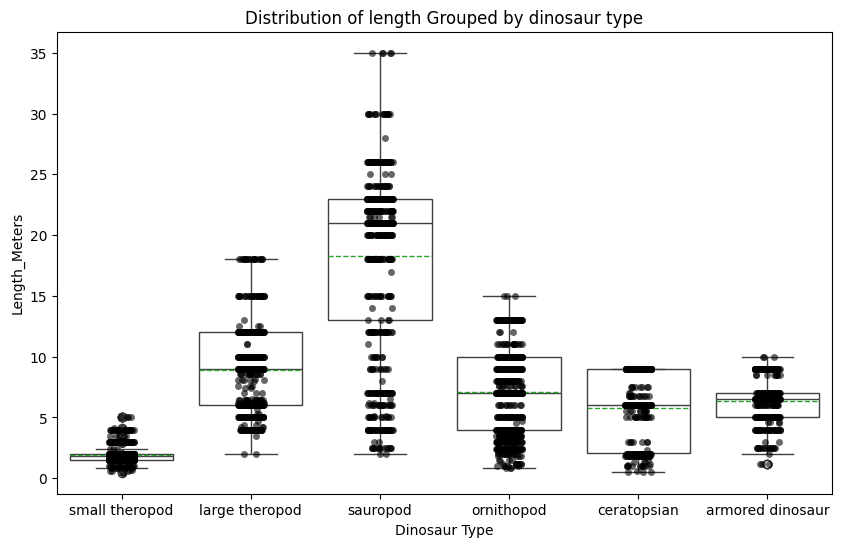

In [46]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='type', y='length_m', data= dinosaurs_filled_length, showmeans=True, meanline=True,
            boxprops={'facecolor':'None'})  # Add mean line and show mean

# Overlay a stripplot to show all data points
sns.stripplot(x='type', y='length_m', data=dinosaurs_filled_length, jitter=True, color='black', alpha=0.6)

# Add a title and labels
plt.title('Distribution of length Grouped by dinosaur type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Length_Meters')

# Show the plot
plt.show()

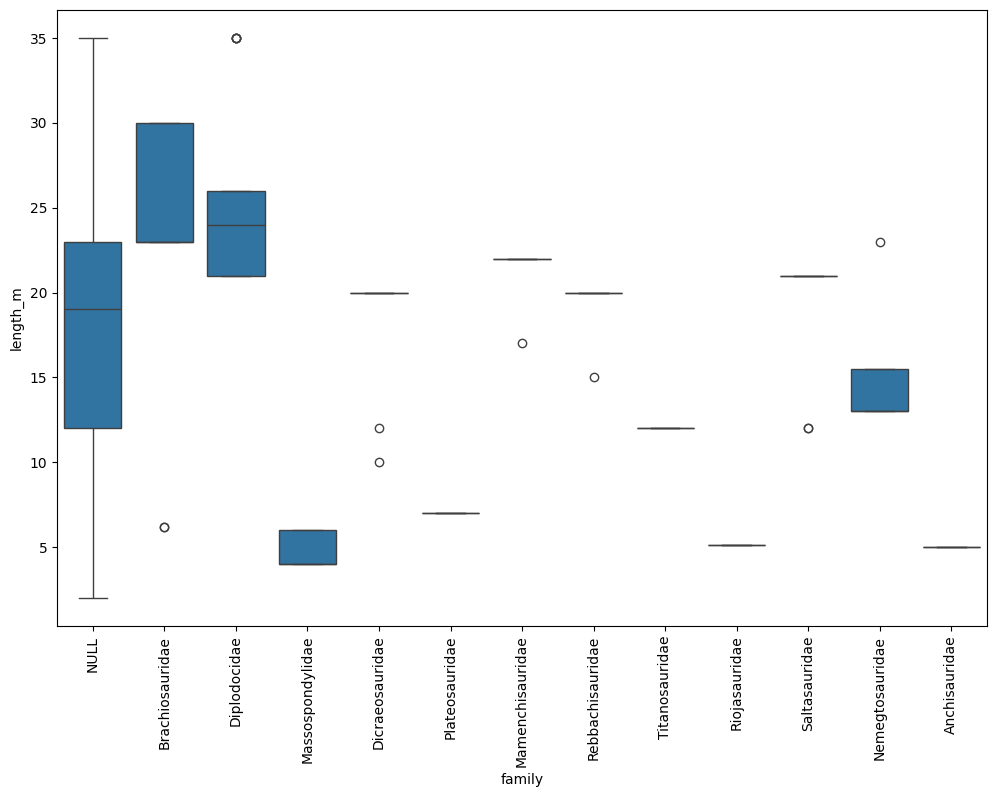

In [47]:
sauropod= dinosaurs[dinosaurs['type']== 'sauropod']
plt.figure(figsize=(12, 8))
sns.boxplot(x='family', y='length_m', data=sauropod)
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


In [48]:
sauropod.groupby('family').size()

family
Anchisauridae         6
Brachiosauridae      67
Dicraeosauridae      22
Diplodocidae        162
Mamenchisauridae     33
Massospondylidae     64
NULL                269
Nemegtosauridae       5
Plateosauridae       38
Rebbachisauridae     21
Riojasauridae         6
Saltasauridae        43
Titanosauridae       23
dtype: int64

### 4.3. Dinosaurs with Most Frequency

Based on the bar plot shown in figure **#XX*, **Ornithopod** type with **904** records has the most occurrences in this dataset.
We can see that the null values are more than any type, once again emphasizing that there is a need to complete the dataset. 
but among the ones that we have the data for Ornithopod with 18.3% has the most frequensy following closely by large and small theropods and saurapods. </br>
ceratopsian and armored dinosaur has the lowest frequency.
The sunburst chart (Figure **#XX**) clearly highlights the dominance of the **Saurischia class** or "lizard-hipped" dinosaurs and effectively visualizes the distribution of each type, family, and individual name within the hierarchy.

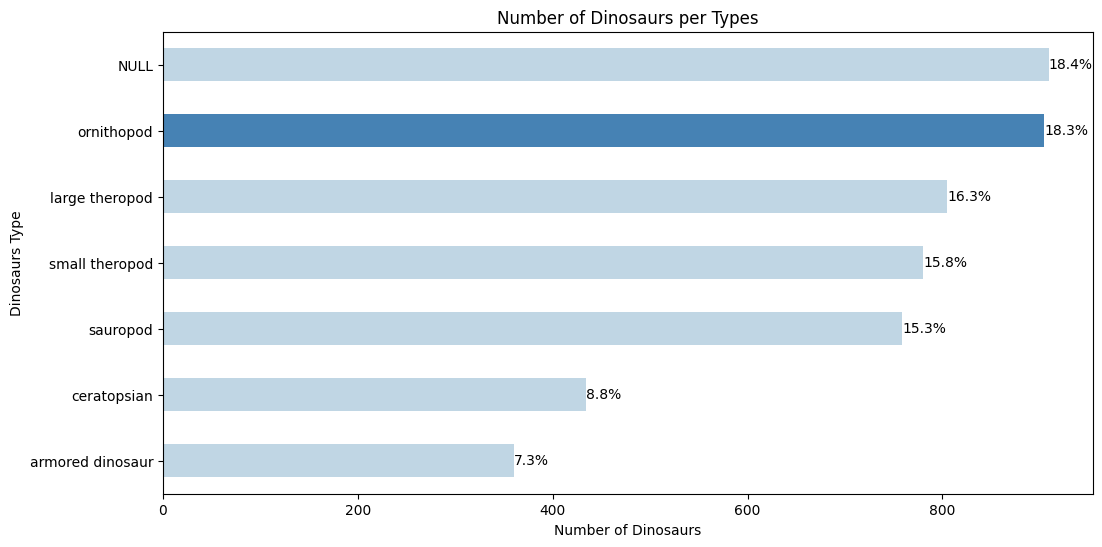

In [82]:
type_counts = dinosaurs['type'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100

# Identify the type with the highest count (excluding "NULL")
top_type = type_counts[type_counts.index != 'NULL'].idxmax()

# Create a color list: bold color for the top type, faded for others
colors = ['#C0D6E4' if type != top_type else 'steelblue' for type in type_counts.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='barh',color = colors)

# Add titles and labels
plt.title('Number of Dinosaurs per Types')
plt.xlabel('Number of Dinosaurs')
plt.ylabel('Dinosaurs Type')

# Annotate each bar with the percentage of the total count
for index, (count, percentage) in enumerate(zip(type_counts.values, type_percentages)):
   plt.text(count + 0.2, index, f'{percentage:.1f}%', va='center', fontsize=10)

# Reverse the y-axis to display the highest count at the top
plt.gca().invert_yaxis()

plt.show()

In [89]:
import plotly.express as px
# Create a sunburst chart
fig = px.sunburst(dinosaurs, path=['class', 'type', 'family','name'])
fig.update_layout(
    width=600,  
    height=600  
)
fig.show()

### 4.4. Dinosaurs' Size Trend


The data does not necessarily show a consistent grow of dinosaurs' length over time. Ther are fewer fossils that were found from dinosaurs of 200 to 300 million years age and although the records of those fossils all have lower than 15 meters length, this cannot demonstrate an increase in size of dinosaurs over time. Because there are numerous fossils found from dinosaurs of less than 75 million years age that are shorter than 5 meters.

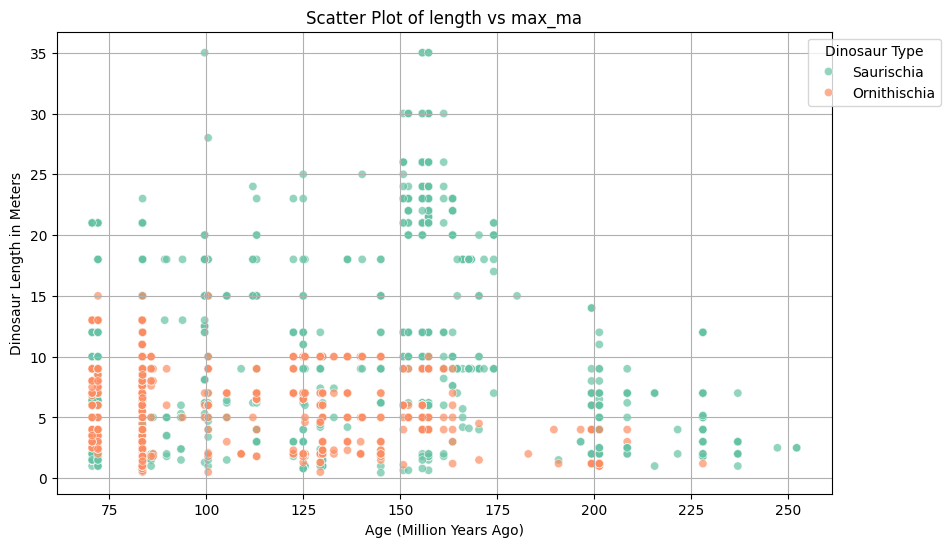

In [50]:
import matplotlib.pyplot as plt

dinosaurs ['mid_ma'] = (dinosaurs ['max_ma']+ dinosaurs ['min_ma'])/2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_ma', y='length_m', hue='class', data=dinosaurs, palette='Set2', alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of length vs max_ma')
plt.xlabel('Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

plt.legend(title="Dinosaur Type", loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the scatter plot
plt.show()

### 4.5. Interactive map showing each record


In [51]:
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=1)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in dinosaurs.iterrows():
    # Assign a color based on the dinosaur class
    marker_color = 'blue' if row['class'] == 'Ornithischia' else 'red'  # Assuming 2 classes: 'Class1' and others
    
    # Add a folium marker to the map
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Record {row['occurrence_no']}\nName: {row['name']}\nRegion: {row['region']}", 
        icon=folium.Icon(color=marker_color)
    ).add_to(marker_cluster)
# Display the map in a Jupyter notebook
#m # Remove the first # sign to see the map

**Note:** The interactive map won't display on GitHub. Here is the static view of the map:

![Map](./map.jpg)

### 4.6. **Other insights from analysis** 
#### 1. Length distribution The median length of dinosaur records is 6.7 meters and most of the records found are shorter than 10 meters long.

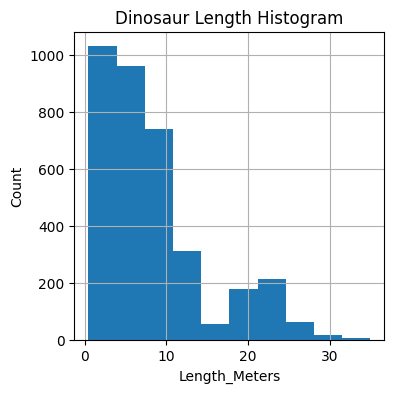

In [52]:
dinosaurs['length_m'].hist(figsize=(4, 4))
plt.title('Dinosaur Length Histogram')
plt.xlabel('Length_Meters')
plt.ylabel('Count')
plt.grid(True)

#### 2. The oldest fossil record belongs to ~252 million years ago and the youngest belongs to ~66 million years ago.

#### 3. The diet of most of the dinosaurs in this table is herbivorous


In [53]:
print(dinosaurs['diet'].unique())
print(dinosaurs['diet'].value_counts())

['omnivorous' 'carnivorous' 'herbivorous' 'NULL']
diet
herbivorous    2472
carnivorous    1308
NULL            959
omnivorous      212
Name: count, dtype: int64


#### 4. min and max age per type


In [54]:
dinosaur_age_range = dinosaurs.groupby('class').agg(
    max_age=('max_ma', 'max'),
    min_age=('min_ma', 'min'),
).reset_index()

print(dinosaur_age_range)

          class  max_age  min_age
0  Ornithischia   237.00     66.0
1    Saurischia   252.17     66.0



## 5. Conclusion
### Insights
### Recommendations for Data Quality Improvement
We should find the underlying reason of having values missing for all three features at the same time

## 6. Future Work

As we progress through geological time, the number of records in our dataset increases significantly. This trend could be attributed to either the growing diversity of dinosaurs over time or our enhanced ability to discover fossils from more recent periods. Further studies are needed to validate these hypotheses. Below is the count of records for each geological period: